In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("NVIDIA_Stock.csv")
df

,Unnamed: 0,Unnamed: 0.1,date,score,num_comments,upvotes_ratio,compound,negative,neutral,positive,Open,High,Low,Close
0,0,0,2020-09-12,2832.0,315.0,13.47,1.2111,0.517,15.092,1.391,620.039978,651.059998,620.530518,649.780029
1,1,1,2020-09-13,3429.0,681.0,16.03,4.0118,0.635,16.966,1.399,620.039978,651.059998,620.530518,649.780029
2,2,2,2020-09-14,3034.0,862.0,17.51,5.8863,0.611,20.223,1.167,523.239990,532.599976,505.250000,514.890015
3,3,3,2020-09-15,2400.0,856.0,12.56,5.2287,0.265,14.853,0.882,531.200012,531.950012,513.109985,519.640015
4,4,4,2020-09-16,1363.0,353.0,7.54,2.2566,0.191,9.412,0.397,518.289978,523.710022,500.549988,500.579987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,255,2021-05-25,35.0,14.0,0.89,0.7783,0.000,0.924,0.076,630.640015,632.739990,619.299988,625.909973
256,256,256,2021-05-26,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,629.369995,631.750000,623.450012,628.000000
257,257,257,2021-05-27,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,627.989990,630.000000,618.400024,619.520020
258,258,258,2021-05-28,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,620.039978,651.099976,620.039978,649.780029


In [4]:
data=df[list(df)[-11:]]
data

,score,num_comments,upvotes_ratio,compound,negative,neutral,positive,Open,High,Low,Close
0,2832.0,315.0,13.47,1.2111,0.517,15.092,1.391,620.039978,651.059998,620.530518,649.780029
1,3429.0,681.0,16.03,4.0118,0.635,16.966,1.399,620.039978,651.059998,620.530518,649.780029
2,3034.0,862.0,17.51,5.8863,0.611,20.223,1.167,523.239990,532.599976,505.250000,514.890015
3,2400.0,856.0,12.56,5.2287,0.265,14.853,0.882,531.200012,531.950012,513.109985,519.640015
4,1363.0,353.0,7.54,2.2566,0.191,9.412,0.397,518.289978,523.710022,500.549988,500.579987
...,...,...,...,...,...,...,...,...,...,...,...
255,35.0,14.0,0.89,0.7783,0.000,0.924,0.076,630.640015,632.739990,619.299988,625.909973
256,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,629.369995,631.750000,623.450012,628.000000
257,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,627.989990,630.000000,618.400024,619.520020
258,58.0,10.0,0.94,0.4019,0.000,0.426,0.574,620.039978,651.099976,620.039978,649.780029


In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data,-1,1).eig

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([5.91330326e-01, 4.69048420e-01, 3.96405796e-01, 3.87154225e-01,
       3.33656871e-01, 3.13361787e-01, 2.97698231e-01, 2.50175417e-01,
       1.45059272e-01, 2.85065876e-02, 1.50395683e-04])

In [14]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [29]:
prediction[:,-1].shape

(52,)

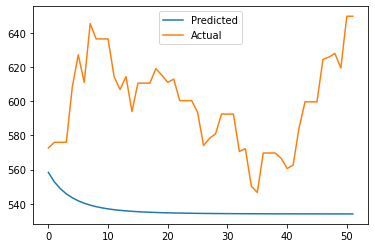

In [41]:
plt.plot(prediction[:,-1],label="Predicted")
plt.plot(range(len(valid)),valid["Close"],label="Actual")
plt.legend()
plt.show()